In [2]:
pip install typing_extensions==4.7.1 --upgrade

  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [4]:
transform = transforms.ToTensor()

#transform = transform.Compose([
#    transforms.ToTensor(),
#    transforms.Normalize((0.5), (0.5))
#])

mnist_data = datasets.MNIST(root='./data', train=True, transform=transform, download=False)

data_loader = torch.utils.data.DataLoader(dataset = mnist_data,
                                         batch_size = 64,
                                         shuffle = True)

100%|████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:19<00:00, 518541.40it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 28986765.69it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:02<00:00, 567953.73it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 4810739.59it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [7]:
dataiter = iter(data_loader)
#images, labels = dataiter.next()
images, labels = next(dataiter)
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [12]:
class Autoencoder(nn.Module):
    def __init__(self):
        # Image size -> N, 784 = 28*28 (N - Batch size)
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),     # N,784 -> N,128
            nn.ReLU(),
            nn.Linear(128, 64),        # N,128 -> N,64
            nn.ReLU(),
            nn.Linear(64, 12),         # N,64 -> N,12
            nn.ReLU(),
            nn.Linear(12, 3)           # N,12 -> N,3
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),          # N,3 -> N,12
            nn.ReLU(),
            nn.Linear(12, 64),         # N,12 -> N,64
            nn.ReLU(),
            nn.Linear(64, 128),        # N,64 -> N,128
            nn.ReLU(),
            nn.Linear(128, 28*28),     # N,12 -> N,3
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
# Note: [-1, 1] -> nn.Tanh

In [13]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [14]:
num_epochs = 10
outputs = []
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        img = img.reshape(-1, 28*28)
        recon = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch:1, Loss:0.0517
Epoch:2, Loss:0.0441
Epoch:3, Loss:0.0374
Epoch:4, Loss:0.0396
Epoch:5, Loss:0.0352
Epoch:6, Loss:0.0440
Epoch:7, Loss:0.0383
Epoch:8, Loss:0.0331
Epoch:9, Loss:0.0366
Epoch:10, Loss:0.0382


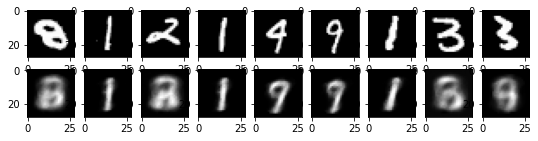

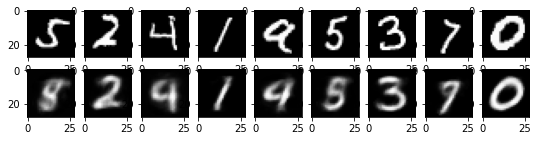

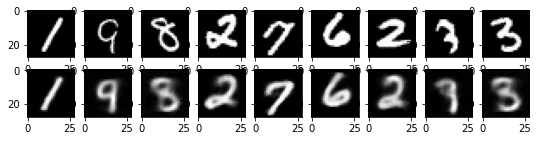

In [15]:
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28, 28)
        # item: 1, 28, 28
        plt.imshow(item[0])
        
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)    # row_length + i + 1
        item = item.reshape(-1, 28, 28)
        # item: 1, 28, 28
        plt.imshow(item[0])